In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
ligs = pd.read_csv("kraken_data/pruned_phos_set.csv")
ligs.head()

,molecule_id,smiles,dipolemoment_max,pyr_P_max,pyr_alpha_max,qpole_amp_max,qpoletens_xx_max,qpoletens_yy_max,qpoletens_zz_max,sterimol_B1_max,...,vbur_qvbur_max_boltzmann_average,vbur_qvbur_min_boltzmann_average,vbur_qvtot_max_boltzmann_average,vbur_qvtot_min_boltzmann_average,vbur_ratio_vbur_vtot_boltzmann_average,vbur_vbur_boltzmann_average,vbur_vtot_boltzmann_average,vmin_r_boltzmann_average,vmin_vmin_boltzmann_average,volume_boltzmann_average
0,8,CC(C)(C)P(C(C)(C)C)C(C)(C)C,0.785410,0.814829,32.633045,2.286466,1.155208,0.415022,-0.639236,3.747826,...,20.849024,14.705131,92.370575,50.689070,0.277816,72.062120,253.71219,1.756687,-0.069888,320.95413
1,12,CC(C)(C)CP(C(C)(C)C)C(C)(C)C,0.819760,0.883014,28.707630,1.997507,0.856250,0.404486,-1.194160,4.009885,...,21.402498,14.062596,89.652150,54.039700,0.271465,74.782196,271.61676,1.767097,-0.064135,345.01490
2,30,CC(C)(C)P(C1CCCCC1)C(C)(C)C,0.895892,0.874687,31.589151,1.286688,0.781740,0.027208,-1.664940,4.018336,...,20.843653,14.072885,114.989580,52.467056,0.240301,68.657555,277.95822,1.767686,-0.066719,351.76666
3,274,CC(C)CP(C(C)(C)C)C(C)(C)C,1.018940,0.883758,29.944244,3.055158,1.496728,0.702659,-1.231566,3.895325,...,20.364431,14.389601,86.572560,45.776230,0.281328,70.843690,254.92955,1.762901,-0.064673,323.85483
4,297,CC(C)(C)P(N[Si](C)(C)C)C(C)(C)C,0.981957,0.881496,29.610458,2.509311,1.314785,1.451032,-1.192633,3.885921,...,24.317236,14.011375,90.615130,52.864120,0.260582,72.680950,285.86057,1.774185,-0.061170,358.63830


In [3]:
pca = PCA(n_components=4)
# Train:
pca.fit(ligs.iloc[:, 2:])

PCA(n_components=4)

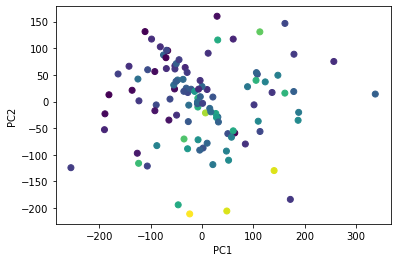

In [4]:
ligs_data_reduced = pca.fit_transform(ligs.iloc[:, 2:])
plt.scatter(
    ligs_data_reduced[:, 0],
    ligs_data_reduced[:, 1],
    c=ligs.vbur_vbur_boltzmann_average
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

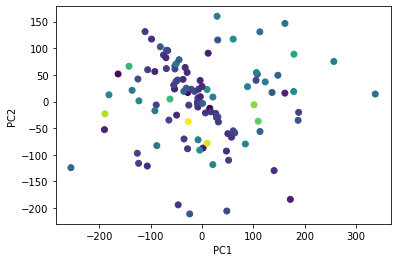

In [5]:
plt.scatter(
    ligs_data_reduced[:, 0],
    ligs_data_reduced[:, 1],
    c=ligs.vmin_vmin_boltzmann_average
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

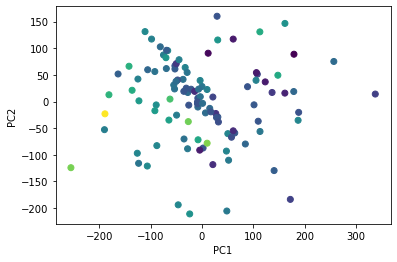

In [7]:
plt.scatter(
    ligs_data_reduced[:, 0],
    ligs_data_reduced[:, 1],
    c=ligs.nbo_lp_P_percent_s_boltzmann_average
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

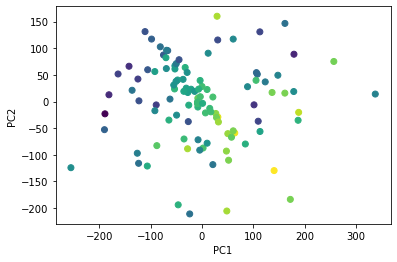

In [8]:
plt.scatter(
    ligs_data_reduced[:, 0],
    ligs_data_reduced[:, 1],
    c=ligs.vbur_max_delta_qvtot_max
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
# So the four components explain over 91% of the variance. That's pretty good.

In [ ]:
plt.scatter(
    ligs_data_reduced[:, 2],
    ligs_data_reduced[:, 3]
)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.show()

In [ ]:
# So those are components 3 and 4. Yup.

In [ ]:
plt.plot(ligs.vmin_vmin_boltzmann_average, np.zeros_like(ligs.vmin_vmin_boltzmann_average) + 0, 'x')
plt.xlabel("vmin_vmin_boltzmann_average")
plt.gca().get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Not the most beautiful plot of all time but it shows the rough coverage of our ligand set in terms of Vmin
# Recall: Vmin is the minimum molecular electrostatic potential (MESP) in the phosphorus lone pair region
# which correlates with experimentally determined TEP
# We can see that our values range from around -0.07 to -0.02 or so. There is a lot less data above -0.045 however
# so we are sort of biased towards the more negative side here. 

In [ ]:
def make_barchart_from_pca_component(pca, component):
    abs_weights = abs(pca.components_[component])
    bar_x, bar_y = [], []
    for i, col_index in enumerate(abs_weights.argsort()[::-1]):
        # print(f"{ligs.iloc[0:0, col_index].name}: {abs_weights[col_index]}")
        if i < 20:
            bar_x.append(ligs.iloc[0:0, col_index].name)
            bar_y.append(abs_weights[col_index])
    
    plt.barh(bar_x[::-1], bar_y[::-1])
    plt.show()

In [ ]:
make_barchart_from_pca_component(pca, 0)

In [ ]:
# So it appears as if electronic parameters are the most significant here I suppose. Boltzmann averaged values top the list.
# Vbur max delta-related steric parameters also rank quite highly.

In [ ]:
make_barchart_from_pca_component(pca, 1)

In [ ]:
# 2nd principal component shows a lot of the same parameters, actually...

In [ ]:
make_barchart_from_pca_component(pca, 2)

In [ ]:
make_barchart_from_pca_component(pca, 3)

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
kmeans = KMeans(n_clusters=3).fit(ligs.iloc[:, 2:])
plt.scatter(
    ligs_data_reduced[:, 0],
    ligs_data_reduced[:, 1],
    c=kmeans.labels_
)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
# KMeans clustering does appear to be generally separating the ligands according to their principal components!